# 2.3 Complex machine learning models - sklearn - random forests
### The following script contains the following:

#### 1. Import libraries, additional requirements
#### 2. Import Data
#### 3. Look at features from 2000-2010
#### 4. Load and split data in training/test sets
#### 5. Create random forest classifier
#### 6. Conduct feature importances analysis
        
---------------------------------------------------------------------------------------------------------------------------
## 1. Import libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [145]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all columns
pd.set_option('display.max_columns', None)

--------------------------------------------------------------------------------------------------------------------------------
## 2. Import Data

In [148]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [150]:
drop_feats = pd.read_csv(os.path.join(path, '02 Data', 'Unsupervised', 'weather-data-cleaned-date.csv'))
drop_feats

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0                   0.81             1.0195                       0.88   
1                   0.84             1.0172                       0.25   
2                   0.77             1.0179                       0.67   
3                   0.93             1.0268                       0.25   
4                   0.99             1.0286                       0.25   
...                  ...                ...                        ...   
22945               0.68             1.0278                       1.57   
22946               0.68             1.0295                       1.57   
22947               0.68             1.0278                       1.57   
22948               0.68             1.0238                       1.57   
22949               0.68             1.0235                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                        0.00                7.0                 3.7   
1                        0.00                0.0                 2.9   
2                        0.00                3.5                 3.1   
3                        0.00                0.0                 2.0   
4                        0.06      

In [152]:
outcomes = pd.read_csv(os.path.join(path, '02 Data', 'Original_Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
outcomes

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

---------------------------------------------------------------------------------------------------------------------------
## 3. Look at features from 2000-2010

In [155]:
# Use features from decade between (2000-2010) for 

# Convert 'DATE' column to string
drop_feats['DATE'] = drop_feats['DATE'].astype(str)

# Convert string dates to datetime format
drop_feats['DATE'] = pd.to_datetime(drop_feats['DATE'], format='%Y%m%d')

# Verify the conversion
drop_feats['DATE']

0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [157]:
# Define the start and end dates of the range
start_date = '2000-01-01'
end_date = '2010-12-31'

# Filter data based on the specified range
decade = drop_feats[(drop_feats['DATE'] >= start_date) & (drop_feats['DATE'] <= end_date)]

# View new dataframe features
decade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610 2000-01-01      1                  8            0.89          1.0286   
14611 2000-01-02      1                  8            0.87          1.0318   
14612 2000-01-03      1                  5            0.81          1.0314   
14613 2000-01-04      1                  7            0.79          1.0262   
14614 2000-01-05      1                  5            0.90          1.0246   
...          ...    ...                ...             ...             ...   
18623 2010-12-27     12                  7            0.80          1.0262   
18624 2010-12-28     12                  8            0.86          1.0226   
18625 2010-12-29     12                  8            0.97          1.0232   
18626 2010-12-30     12                  8            1.00          1.0242   
18627 2010-12-31     12                  8            1.00          1.0251   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18623                    0.45                 0.00             2.0   
18624                    0.22                 0.08             0.0   
18625                    0.20                 0.00             0.0   
18626                    0.13                 0.00             0.0   
18627                    0.13                 0.00             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   
14611              3.6             2.7             4.8                     8   
14612              2.2             0.1             4.8                     5   
14613              3.9             0.5             7.5                     7   
14614              6.0             3.8             8.6                     7   
...                ...             ...             ...                   ...   
18623             -6.0           -10.8            -2.4                     8   
18624             -1.8            -3.8             0.3                     3   
18625              0.7            -0.1             2.0                     5   
18626              0.0            -0.4             0.6                     8   
18627              0.1            -0.5             0.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
14610               0.88             1.0275                       0.24   
14611               0.85             1.0303                       0.25   
14612               0.84             1.0310                       0.50   
14613               0.94             1.0258                       0.35   
14614               0.95             1.0254                       0.30   
...                  ...                ...                        ...   
18623               0.89             1.0238                       0.24   
18624               0.77             1.0252                       0.59   
18625               0.91             1.0272                       0.69   
18626               0.91             1.0289                       0.24   
18627               0.90             1.0271                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
14610                    0.00                0.0                -2.5   
14611                    0.00                0.0                -1.2   
14612                    0.00                1.4                -1.0   
14613                    0.00                0.3                -1.3   
14614                   

In [159]:
# Drop [DATE, MONTH]
X = decade.drop(['DATE', 'MONTH'], axis=1)

X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610                  8            0.89          1.0286   
14611                  8            0.87          1.0318   
14612                  5            0.81          1.0314   
14613                  7            0.79          1.0262   
14614                  5            0.90          1.0246   
...                  ...             ...             ...   
18623                  7            0.80          1.0262   
18624                  8            0.86          1.0226   
18625                  8            0.97          1.0232   
18626                  8            1.00          1.0242   
18627                  8            1.00          1.0251   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18623                    0.45                 0.00             2.0   
18624                    0.22                 0.08             0.0   
18625                    0.20                 0.00             0.0   
18626                    0.13                 0.00             0.0   
18627                    0.13                 0.00             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   
14611              3.6             2.7             4.8                     8   
14612              2.2             0.1             4.8                     5   
14613              3.9             0.5             7.5                     7   
14614              6.0             3.8             8.6                     7   
...                ...             ...             ...                   ...   
18623             -6.0           -10.8            -2.4                     8   
18624             -1.8            -3.8             0.3                     3   
18625              0.7            -0.1             2.0                     5   
18626              0.0            -0.4             0.6                     8   
18627              0.1            -0.5             0.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
14610               0.88             1.0275                       0.24   
14611               0.85             1.0303                       0.25   
14612               0.84             1.0310                       0.50   
14613               0.94             1.0258                       0.35   
14614               0.95             1.0254                       0.30   
...                  ...                ...                        ...   
18623               0.89             1.0238                       0.24   
18624               0.77             1.0252                       0.59   
18625               0.91             1.0272                       0.69   
18626               0.91             1.0289                       0.24   
18627               0.90             1.0271                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
14610                    0.00                0.0                -2.5   
14611                    0.00                0.0                -1.2   
14612                    0.00                1.4                -1.0   
14613                    0.00                0.3                -1.3   
14614                    0.00                0.1                -0.8   
...                       ...                ...                 ...   
18623                    0.16                0.0                -3.8   
18624              

In [161]:
# Export cleaned dataset of last decade
X.to_csv(os.path.join(path, '02 Data', 'Unsupervised', 'weather-cleaned-last-decade.csv'), index=False)

In [163]:
# Use features from decade between (2000-2010) for 

# Convert 'DATE' column to string
outcomes['DATE'] = outcomes['DATE'].astype(str)

# Convert string dates to datetime format
outcomes['DATE'] = pd.to_datetime(outcomes['DATE'], format='%Y%m%d')

# Verify the conversion
outcomes['DATE']

0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [165]:
# Define the start and end dates of the range
start_date = '2000-01-01'
end_date = '2010-12-31'

# Filter data based on the specified range
outcomes_d = outcomes[(outcomes['DATE'] >= start_date) & (outcomes['DATE'] <= end_date)]

# View new dataframe features
outcomes_d

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610 2000-01-01                       0                          0   
14611 2000-01-02                       0                          0   
14612 2000-01-03                       0                          0   
14613 2000-01-04                       0                          0   
14614 2000-01-05                       0                          0   
...          ...                     ...                        ...   
18623 2010-12-27                       0                          0   
18624 2010-12-28                       0                          0   
18625 2010-12-29                       0                          0   
18626 2010-12-30                       0                          0   
18627 2010-12-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18623                          0                        0   
18624                          0                        0   
18625                          0                        0   
18626                          0                        0   
18627                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18623                            0                          0   
18624                            0                          0   
18625                            0                          0   
18626                            0                          0   
18627                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18623                        0                           0   
18624                        0                           0   
18625                        0                           0   
18626                        0                           0   
18627                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18623                            0                        0   
18624                            0                        0   
18625                            0                        0   
18626                            0                        0   
18627                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                    

In [167]:
# Drop [DATE, MONTH]
y = outcomes_d.drop(['DATE'], axis=1)

y

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610                       0                          0   
14611                       0                          0   
14612                       0                          0   
14613                       0                          0   
14614                       0                          0   
...                       ...                        ...   
18623                       0                          0   
18624                       0                          0   
18625                       0                          0   
18626                       0                          0   
18627                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18623                          0                        0   
18624                          0                        0   
18625                          0                        0   
18626                          0                        0   
18627                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18623                            0                          0   
18624                            0                          0   
18625                            0                          0   
18626                            0                          0   
18627                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18623                        0                           0   
18624                        0                           0   
18625                        0                           0   
18626                        0                           0   
18627                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18623                            0                        0   
18624                            0                        0   
18625                            0                        0   
18626                            0                        0   
18627                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                          0                      0   
14612                          0                      0   
14613                          0  

In [169]:
# Export cleaned dataset of last decade
y.to_csv(os.path.join(path, '02 Data', 'Unsupervised', 'outcomes-cleaned-last-decade.csv'), index=False)

---------------------------------------------------------------------------------------------------------------------------
## 4. Load and split data in training/test sets

In [172]:
# List of weather stations prefixes;
weather = [
    'BASEL_',
    'BELGRADE_',
    'BUDAPEST_',
    'DEBILT_',
    'DUSSELDORF_',
    'HEATHROW_',
    'KASSEL_',
    'LJUBLJANA_',
    'MAASTRICHT_',
    'MADRID_',
    'MUNCHENB_',
    'OSLO_',
    'SONNBLICK_',
    'STOCKHOLM_',
    'VALENTIA_'
]

In [174]:
# Dictionary mapping outcomes to weather stations for confusion matrix;
weather_outcomes = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'
}

In [176]:
# Load data, process it, and format it appropriately for training a machine learning model.

In [178]:
# Reshape df;
#X = decade.values.reshape(-1, 15, 9)

# Ensure the labels are in the same shape as X;
#y = outcomes.values.reshape(-1, 15)

def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [180]:
X.shape

(4018, 135)

In [182]:
y.shape

(4018, 15)

In [184]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3214, 135) (3214, 15)
(804, 135) (804, 15)


In [188]:
# Reshape X_train
#X_train = X_train.values.reshape(-1, 15) #-1 means "whatever works"
print(X_train.shape)
X_train

(3214, 135)


BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18223                  6            0.77          1.0202   
17271                  0            0.53          1.0193   
17900                  5            0.72          1.0263   
15685                  7            0.83          1.0223   
17859                  6            0.74          1.0079   
...                  ...             ...             ...   
15740                  8            0.88          0.9978   
15904                  3            0.54          1.0219   
15470                  3            0.67          1.0090   
18117                  8            0.89          1.0173   
17784                  3            0.68          1.0173   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18223                    0.12                 0.11             0.0   
17271                    2.59                 0.00            12.3   
17900                    0.50                 0.00             2.9   
15685                    0.40                 0.00             0.8   
17859                    0.47                 0.71             0.7   
...                       ...                  ...             ...   
15740                    0.37                 1.45             0.7   
15904                    3.25                 0.00            13.3   
15470                    3.03                 0.00            11.6   
18117                    0.41                 3.35             0.1   
17784                    2.19                 0.00             9.7   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18223              8.9             5.0            12.7                     5   
17271             18.6            10.3            26.2                     0   
17900             -3.1            -6.2            -1.8                     5   
15685             -1.9            -2.6            -0.5                     8   
17859              0.8            -0.8             2.6                     2   
...                ...             ...             ...                   ...   
15740              0.4            -2.1             3.7                     7   
15904             21.9            14.0            28.4                     7   
15470             15.2             9.2            22.2                     6   
18117             19.7            17.4            21.1                     3   
17784             18.7            10.5            26.5                     0   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18223               0.90             1.0221                       0.70   
17271               0.43             1.0207                       2.77   
17900               0.78             1.0269                       0.64   
15685               0.67             1.0330                       0.24   
17859               0.52             1.0073                       0.94   
...                  ...                ...                        ...   
15740               0.63             0.9930                       0.34   
15904               0.87             1.0173                       1.06   
15470               0.55             1.0134                       2.21   
18117               0.77             1.0159                       2.69   
17784               0.52             1.0198                       2.48   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18223                    0.00                3.4                 6.9   
17271                    0.00               12.0                16.1   
17900                    0.00                3.1                -4.1   
15685                    0.00                0.0                -4.0   
17859                    0.00                6.8                 1.7   
...                       ...                ...                 ...   
15740                    1.08                0.0                 3.9   
15904              

In [190]:
y_train

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18223                       0                          0   
17271                       1                          1   
17900                       0                          0   
15685                       0                          0   
17859                       0                          0   
...                       ...                        ...   
15740                       0                          0   
15904                       1                          0   
15470                       1                          0   
18117                       0                          1   
17784                       1                          1   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18223                          0                        0   
17271                          1                        1   
17900                          0                        0   
15685                          0                        0   
17859                          0                        0   
...                          ...                      ...   
15740                          0                        0   
15904                          0                        0   
15470                          0                        0   
18117                          1                        1   
17784                          1                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18223                            0                          0   
17271                            1                          1   
17900                            0                          0   
15685                            0                          0   
17859                            0                          0   
...                            ...                        ...   
15740                            0                          0   
15904                            1                          1   
15470                            0                          0   
18117                            0                          1   
17784                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18223                        0                           0   
17271                        1                           1   
17900                        0                           0   
15685                        0                           0   
17859                        0                           0   
...                        ...                         ...   
15740                        0                           0   
15904                        1                           1   
15470                        0                           1   
18117                        0                           1   
17784                        0                           1   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18223                            0                        0   
17271                            1                        0   
17900                            0                        0   
15685                            0                        0   
17859                            0                        0   
...                            ...                      ...   
15740                            0                        0   
15904                            1                        1   
15470                            0                        0   
18117                            1                        1   
17784                            1                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18223                          0                      0   
17271                          1                      1   
17900                          0                      0   
15685                          0  

In [192]:
#Use argmax to get rid of on-hot encoding and supply the numerical value.
y_train = np.argmax(y_train, axis = 1)
print(y_train.shape)
y_train

(3214,)


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [194]:
import numpy as np

X_test = X_test.to_numpy()  # Convert to a NumPy array
X_test = X_test.reshape(804, -1)  # Reshape the array
print(X_test.shape)


(804, 135)


In [196]:
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)
y_test

(804,)


array([ 0,  0,  2,  0,  9,  9,  0,  0,  9,  0,  0,  0,  0,  1,  2,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  9,
        0,  1,  0,  0,  5,  0,  0,  7,  1,  0,  0,  0,  1, 14,  6,  9,  1,
        0,  0,  0,  0,  1, 10,  1,  0,  0,  0,  0,  0,  9,  2,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  3,  0,  1,  9,  1,  9,  1,  0,  1,  0,
        0,  0,  0,  0,  9,  0,  9,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  1,  0,  1,  0,  0,  9,
        0,  9,  0,  1,  0,  0,  3,  0,  1,  0,  1,  0,  0,  0,  0,  0,  9,
        0,  5,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  1,  0,
        9,  0,  0,  1,  0,  9,  0,  1,  0,  0,  0,  0,  0,  9,  0,  0,  0,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  9,  9,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  5,
        1,  1,  1,  0,  0,  1,  0,  9,  0,  0,  0,  1,  9,  9,  6,  9,  0,
        0,  0,  0,  1,  0

In [198]:
#len(X_train[0])

---------------------------------------------------------------------------------------------------------------------------
## 5. Create random forest classifier

In [203]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8805970149253731


- **Notes:** relatively high prediction accuracy of approx. 90%.

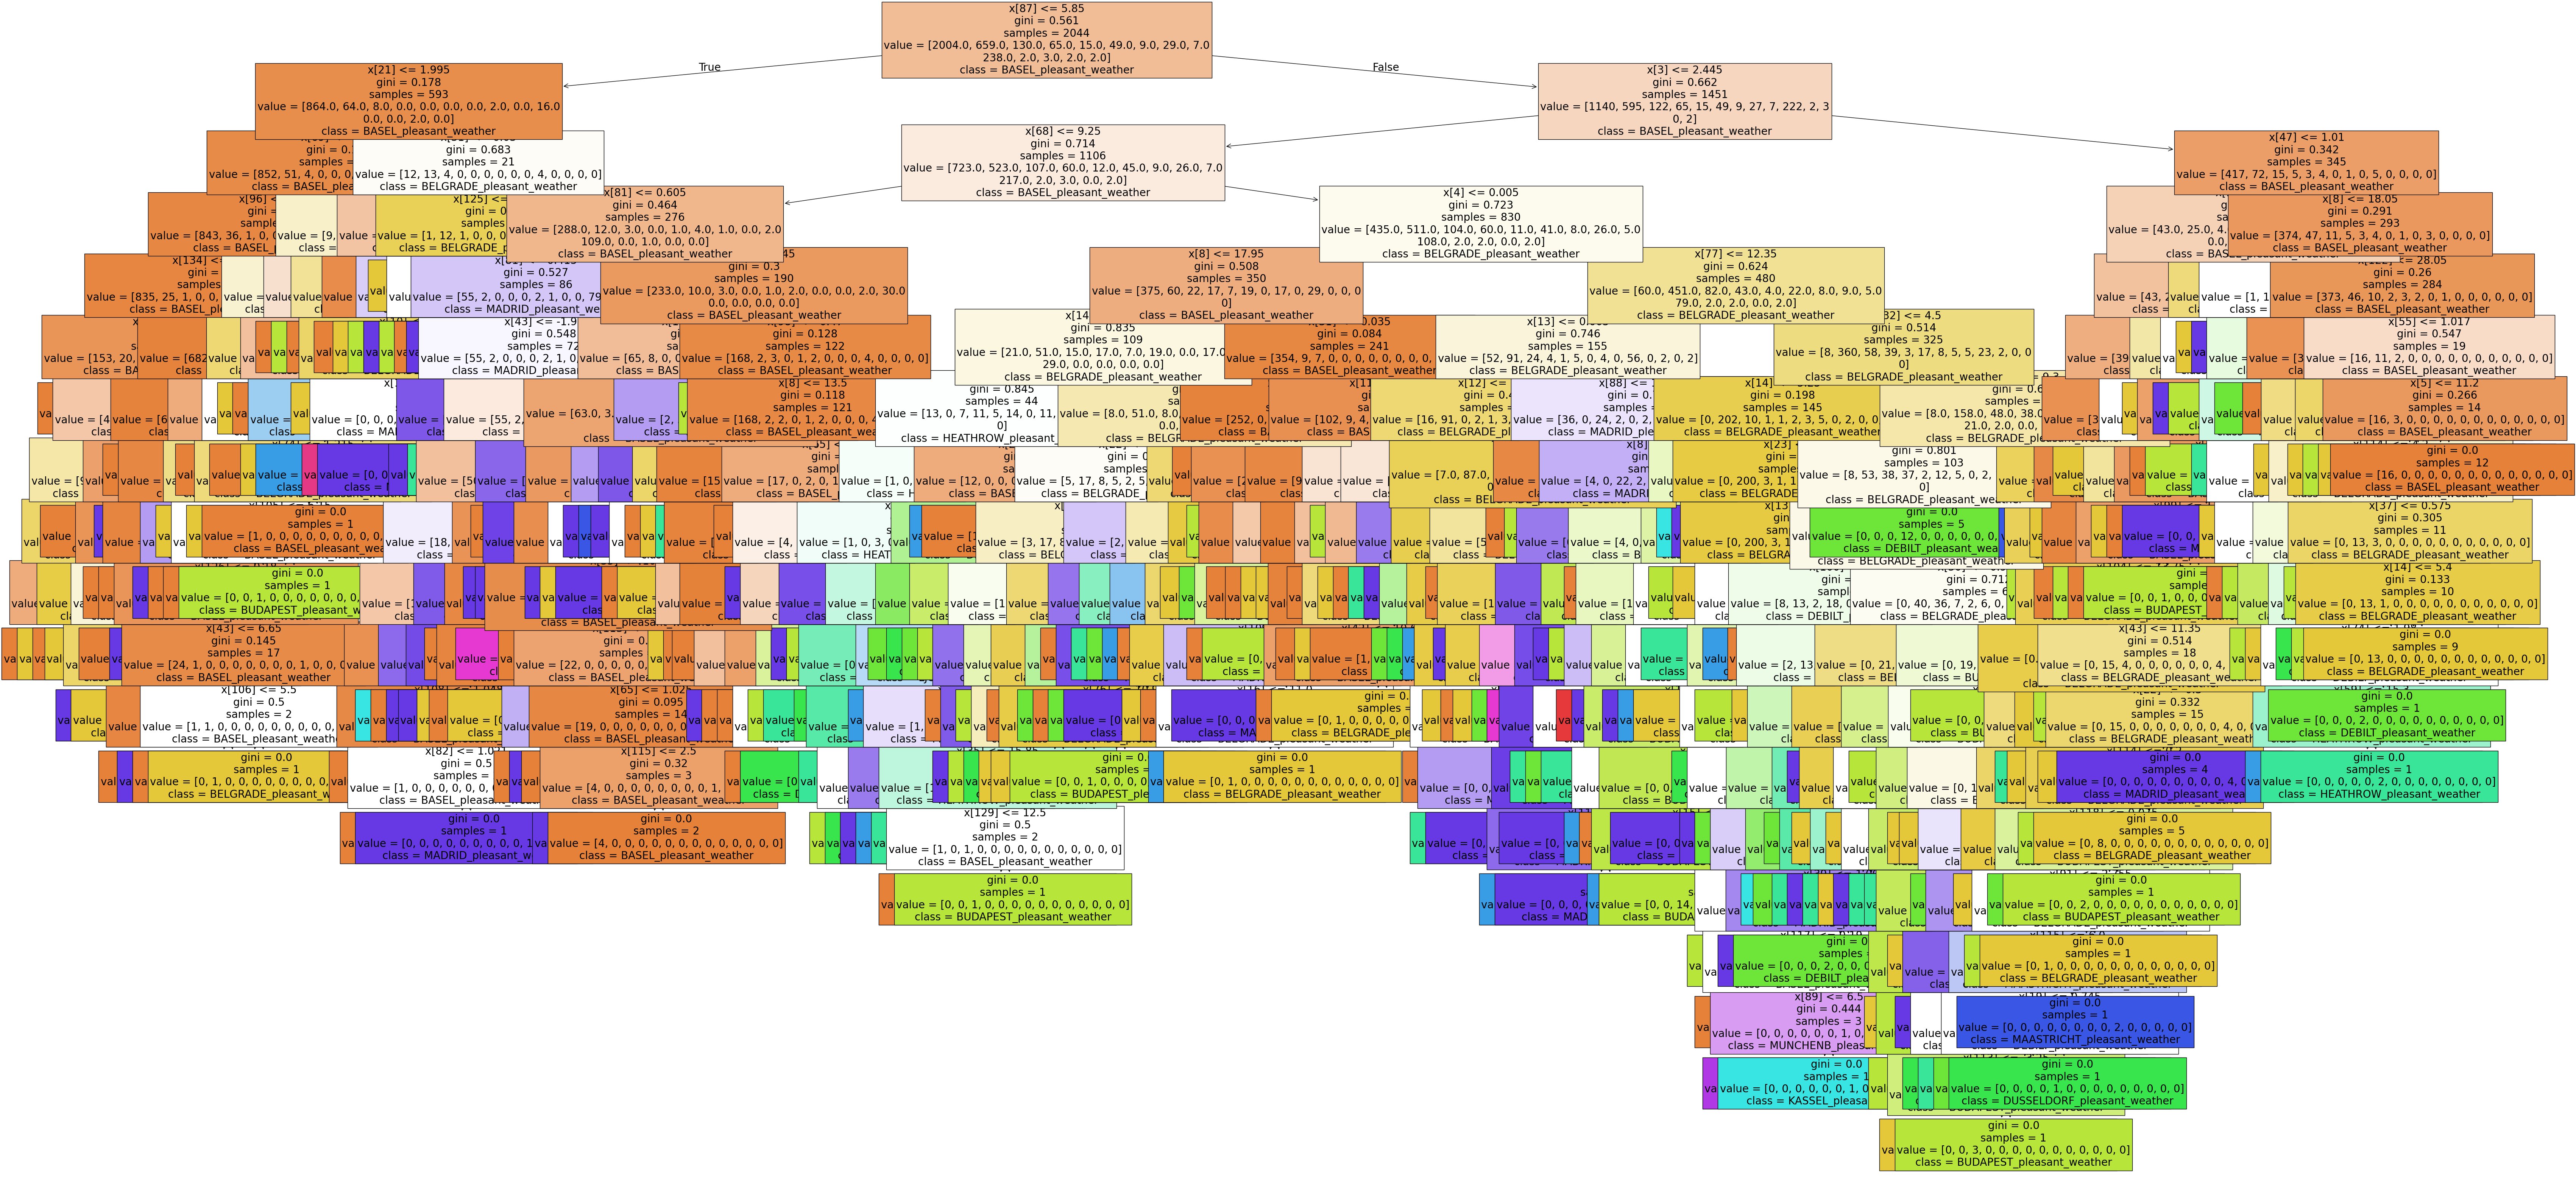

In [210]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=weather_outcomes, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

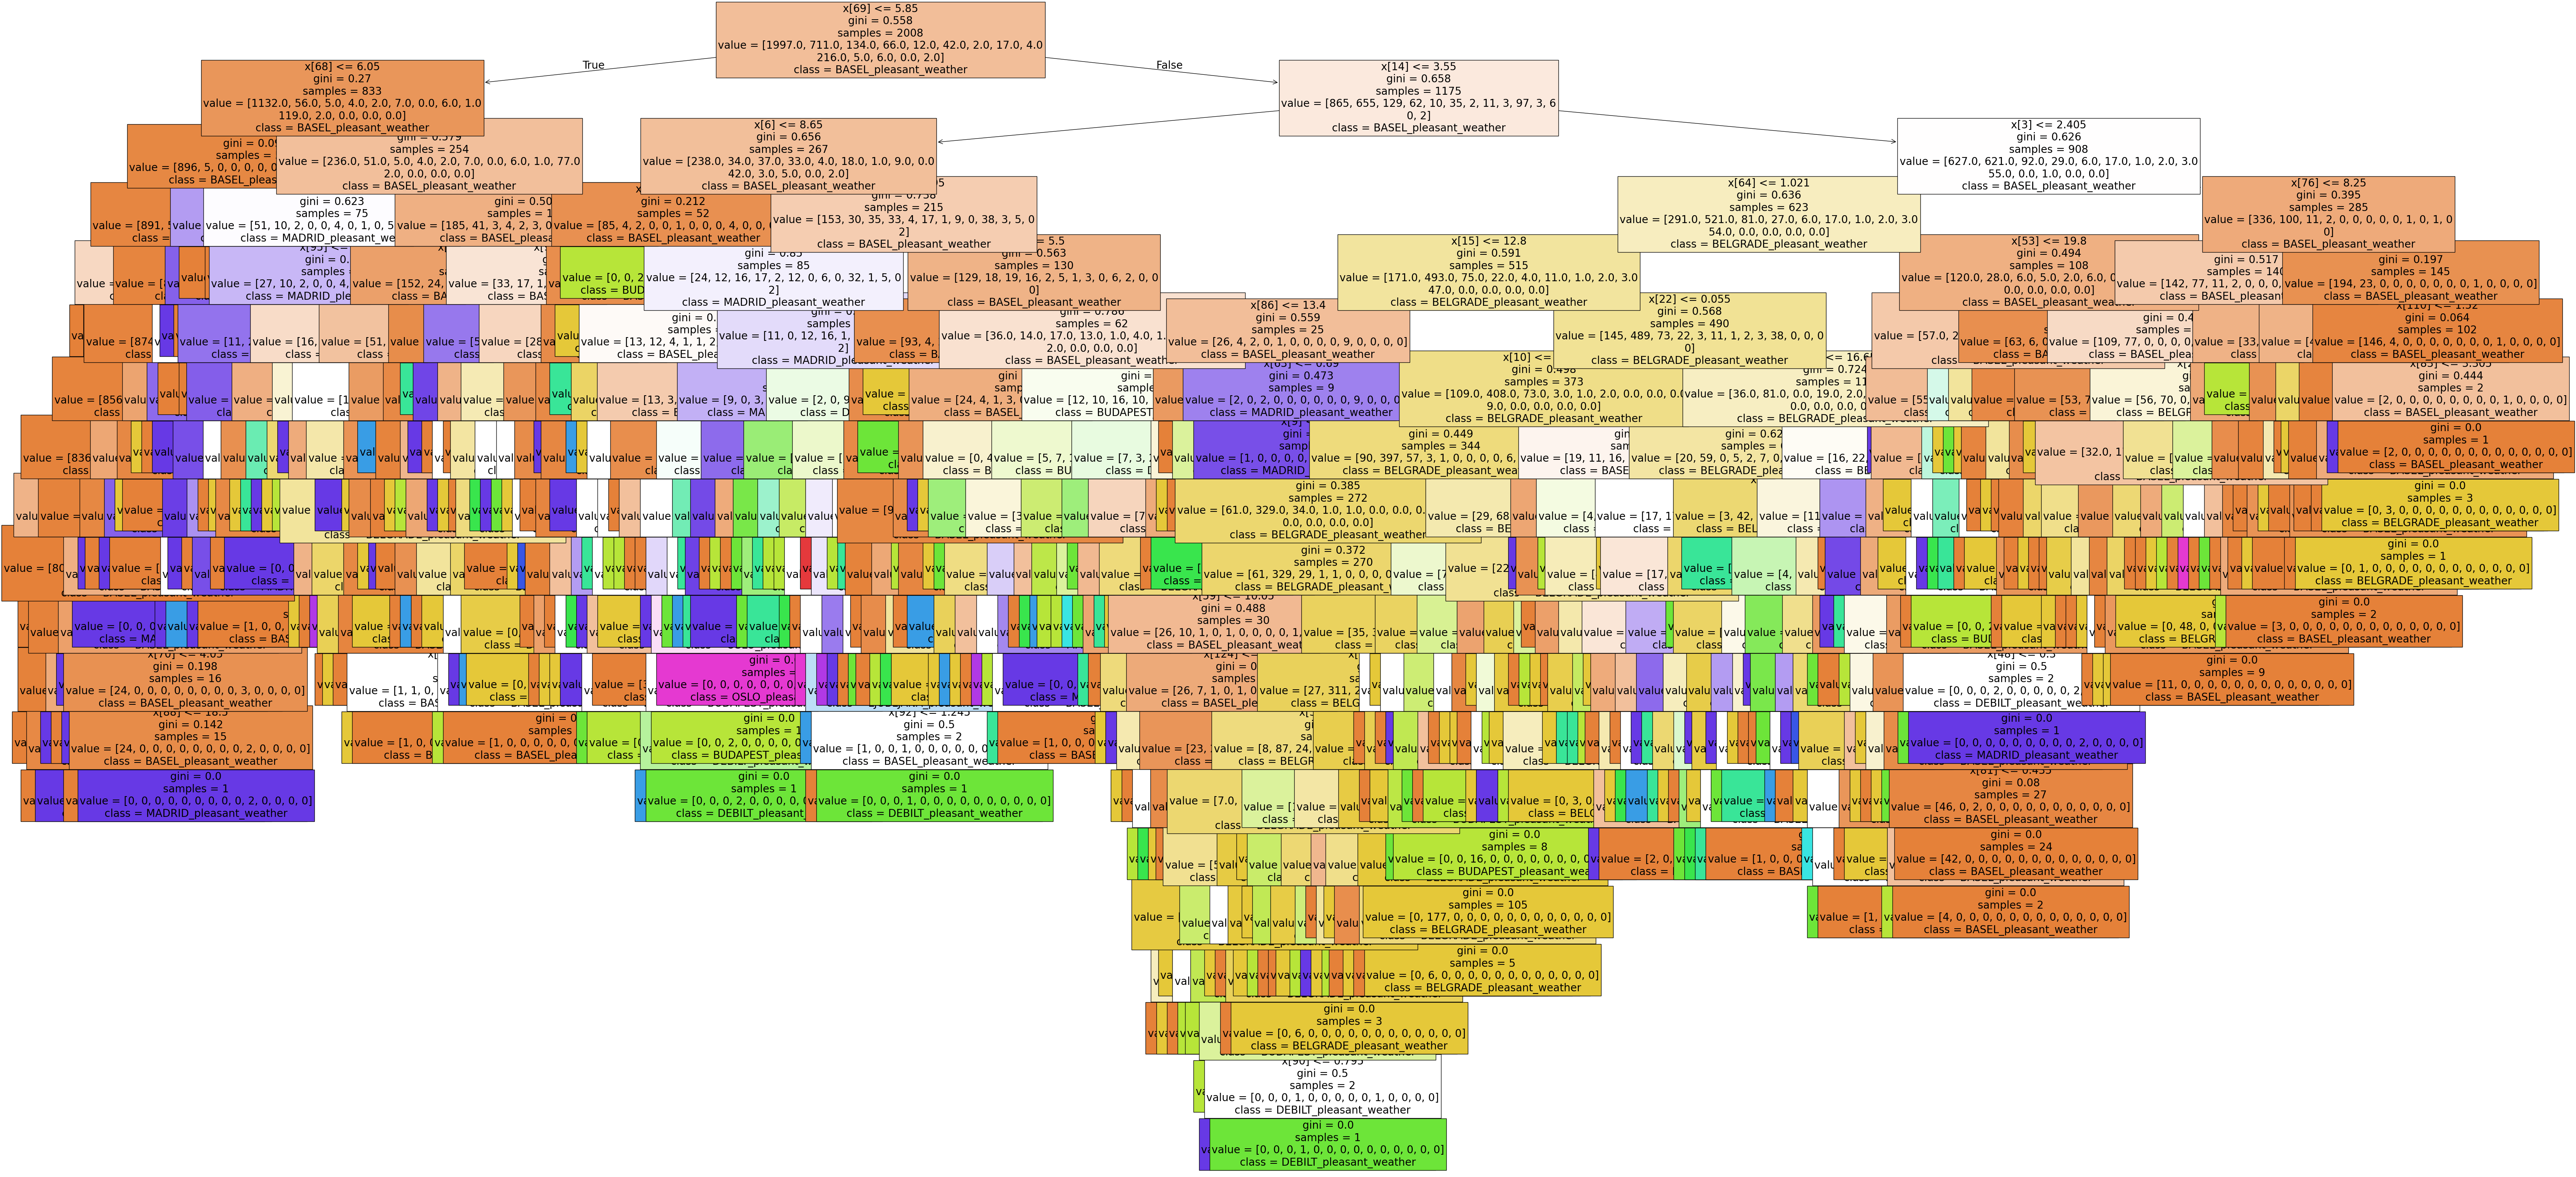

In [211]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=weather_outcomes, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 6. Conduct feature importances analysis

In [215]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01066565, 0.01078863, 0.00590791, 0.01837684, 0.10228468,
       0.02123614, 0.01373703, 0.00487609, 0.01820215, 0.01014125,
       0.00912723, 0.00611567, 0.0086138 , 0.04311974, 0.01117974,
       0.02369601, 0.00972048, 0.02324673, 0.0038122 , 0.00550243,
       0.00409617, 0.00673819, 0.00852377, 0.00697972, 0.01516189,
       0.00973489, 0.01859037, 0.00211457, 0.00312476, 0.00539627,
       0.00391261, 0.00350813, 0.00325962, 0.00526903, 0.00303914,
       0.00814833, 0.00224759, 0.00302862, 0.00508297, 0.00529316,
       0.00266195, 0.00375658, 0.00846243, 0.00441631, 0.00867872,
       0.00185017, 0.00290003, 0.00502251, 0.00459178, 0.00237491,
       0.00289162, 0.00507203, 0.00388761, 0.00785992, 0.00330432,
       0.00710475, 0.00471237, 0.00376135, 0.00391884, 0.00589554,
       0.00452925, 0.00864586, 0.00200672, 0.00418098, 0.00535793,
       0.00568227, 0.0033669 , 0.00454404, 0.01741791, 0.0062635 ,
       0.02092218, 0.00276615, 0.00322134, 0.0062539 , 0.00471

In [217]:
np.set_printoptions(threshold=1000)

In [219]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.01066565, 0.01078863, 0.00590791, 0.01837684, 0.10228468,
         0.02123614, 0.01373703, 0.00487609, 0.01820215],
        [0.01014125, 0.00912723, 0.00611567, 0.0086138 , 0.04311974,
         0.01117974, 0.02369601, 0.00972048, 0.02324673],
        [0.0038122 , 0.00550243, 0.00409617, 0.00673819, 0.00852377,
         0.00697972, 0.01516189, 0.00973489, 0.01859037],
        [0.00211457, 0.00312476, 0.00539627, 0.00391261, 0.00350813,
         0.00325962, 0.00526903, 0.00303914, 0.00814833],
        [0.00224759, 0.00302862, 0.00508297, 0.00529316, 0.00266195,
         0.00375658, 0.00846243, 0.00441631, 0.00867872],
        [0.00185017, 0.00290003, 0.00502251, 0.00459178, 0.00237491,
         0.00289162, 0.00507203, 0.00388761, 0.00785992],
        [0.00330432, 0.00710475, 0.00471237, 0.00376135, 0.00391884,
         0.00589554, 0.00452925, 0.00864586, 0.00200672],
        [0.00418098, 0.00535793, 0.00568227, 0.0033669 , 0.00454404,
         0.01741791, 0.0062635 , 0.0209221

In [221]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.20607513, 0.14496064, 0.07913963, 0.03777246, 0.04362833,
       0.03645058, 0.04387901, 0.07050185, 0.04333477, 0.10355499,
       0.05381522, 0.02916747, 0.03716455, 0.03336181, 0.03719355])

In [223]:
important = pd.Series(sumarray, index = weather) #.sort_values(ascending = False)
important

BASEL_         0.206075
BELGRADE_      0.144961
BUDAPEST_      0.079140
DEBILT_        0.037772
DUSSELDORF_    0.043628
HEATHROW_      0.036451
KASSEL_        0.043879
LJUBLJANA_     0.070502
MAASTRICHT_    0.043335
MADRID_        0.103555
MUNCHENB_      0.053815
OSLO_          0.029167
SONNBLICK_     0.037165
STOCKHOLM_     0.033362
VALENTIA_      0.037194
dtype: float64

['BASEL_', 'BELGRADE_', 'BUDAPEST_', 'DEBILT_', 'DUSSELDORF_', 'HEATHROW_', 'KASSEL_', 'LJUBLJANA_', 'MAASTRICHT_', 'MADRID_', 'MUNCHENB_', 'OSLO_', 'SONNBLICK_', 'STOCKHOLM_', 'VALENTIA_']


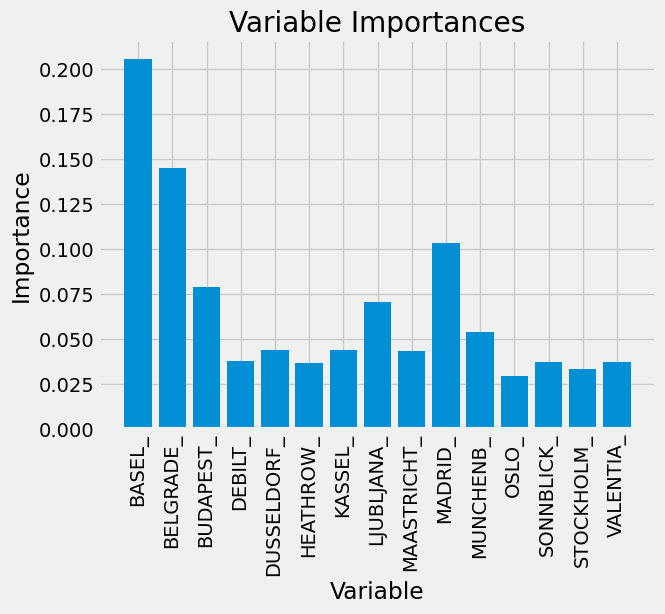

In [225]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

- **Notes:** Basel, Belgrade, and Madrid weather stations hold the most variable importance (weight) in our random tree prediction model, with an accuracy of 88%.

            - It's recommended to explore these features more in depth, specifically, we want to query which of the
            9 observations for these top 3/15 weather stations will have the most importance in pleasant weather day
            predictions?

------------------------------------------------------------------------------------------------------------------------